# <span style="color:#2c061f"> Macro 318: Tutorial #4 </span>  

<br>

## <span style="color:#374045"> Solow-Swan model </span>


#### <span style="color:#374045"> Lecturer: </span> <span style="color:#d89216"> <br> Dawie van Lill (dvanlill@sun.ac.za) </span>

These are basic notes for the Solow model in Julia. In this notebook we will also be going over the basics of difference equations and how they relate the Solow model. 

You will notice that the Solow model is different from our models that we previously covered in that it contains a time component. This is why we need to consider **dynamics**. Evolution of variables over time. 

Below are the packages that we will be using for this tutorial. 

In [2]:
import Pkg

In [3]:
Pkg.add("LaTeXStrings")
Pkg.add("Plots")
Pkg.add("Symbolics")
Pkg.add("Zygote")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [4]:
using LaTeXStrings
using Plots
using Symbolics
using Zygote

# Learning outcomes

# Table of contents

1. Consumers
2. Firms
3. Competitive equilibrium
4. Steady state
5. Shocks
6. Difference equations (optional)

## 1. Consumers 

In class we discussed the Solow model in detail. We started with some of the following assumption, 

$$
N_{t+1} = (1 + n) N_{t}
$$

This means that the population grows at a constant rate $n$. 

**Notation**: The notation has changed a bit here. We are now working with time subscripts. This is more traditional in the literature and also will help with our explanations down the line. 

An important consideration for this model is the behaviour of consumers with respect to saving and investment. 

### 1.1 Saving and investment

Consumption and savings decisions are not microfounded in the Solow model. Decisions are made in a stylised way. 

The savings rate $s \in (0, 1)$ is **exogenous**!

Saving is a portion of income $\rightarrow S_t = s Y_{t}$

Agents consume the rest of their income $ \rightarrow C_{t} = (1 - s)Y_{t}$

Saving is a key component since it will finance **investment activities** in the model.

Investment equals saving in this economy $\rightarrow I_t = sY_t = S_t$

In a closed economy with no government $\rightarrow C_t = Y_t - I_t$

Next we look at the **firm side** of the problem. We start with the production function. 

## 2. Firms

One of the most important considerations in the Solow model is the production function. The production function is given by 

$$
Y_{t}\left(K_{t}, N_{t}\right) = z \cdot F\left(K_{t}, N_{t}\right)
$$

### 2.1. Cobb-Douglas production function 

For this example we can assume a Cobb-Douglas production function in discrete time $(t)$ with Hicks-neutral techonology $(z)$, and with constant returns to scale where $\alpha \in (0, 1)$ is the output elasticity of capital.

$$
\begin{equation*}
    Y_{t}\left(K_{t}, N_{t}\right) = z \cdot F\left(K_{t}, N_{t}\right) =  z \cdot \left(K_{t} ^{\alpha} N_{t}^{1-\alpha}\right)
\end{equation*}
$$

From our notes we have that there are decreasing and positive returns to scale in each factor individually. We can observe this from the partial derivatives. The first and second derivatives with respect to capital and labor are:
$$
\begin{align*}
    \frac{\partial   Y_{t}}{\partial K}   = \alpha \cdot z\left(\frac{N_{t}}{K_{t}}\right)^{1-\alpha} 
  = \alpha \cdot \frac{Y_{t}}{K_{t}} > 0 \; \text{and} \;
    \frac{\partial^2 Y_{t}}{\partial K^2} = -\alpha (1-\alpha) \cdot z\left(\frac{N_{t}}{K_{t}}\right)^{1-\alpha} < 0 \\
    \frac{\partial   Y_{t}}{\partial N}   = (1-\alpha) \cdot z\left(\frac{K_{t}}{N_{t}}\right)^{\alpha} 
  = (1-\alpha) \cdot \frac{Y_{t}}{N_{t}} > 0 \; \text{and} \;
    \frac{\partial^2 Y_{t}}{\partial N^2} = -\alpha (1-\alpha) \cdot z\left(\frac{K_{t}}{N_{t}}\right)^{1-\alpha} < 0
\end{align*}
$$

We know from our experience with Julia so far that we can calculate these partial derivatives using the `Symbolics` package. 

In [4]:
@variables K N z α

Y = z * (K ^ α) * (N ^ (1 - α)) 

∂Y_∂K = Differential(K)
∂Y_∂N = Differential(N)
∂2Y_∂K2 = Differential(K) ∘ Differential(K)
∂2Y_∂N2 = Differential(N) ∘ Differential(N);

In [5]:
expand_derivatives(∂Y_∂K(Y))

z*α*(K^(α - 1))*(N^(1 - α))

In [6]:
expand_derivatives(∂Y_∂N(Y))

z*(K^α)*(N^(-α))*(1 - α)

In [7]:
expand_derivatives(∂2Y_∂K2(Y))

z*α*(K^(α - 2))*(N^(1 - α))*(α - 1)

In [8]:
expand_derivatives(∂2Y_∂N2(Y))

-z*α*(K^α)*(N^(-1 - α))*(1 - α)

### 2.2 Production per capita

Next, we write our production function in its intensive form. This means that we write the production function in per capita terms, 

$$
\begin{align*}
    Y_{t} &= z \cdot \left(K_{t}^{\alpha}N_{t}^{1-\alpha} \right) \\
    y_{t} &= \frac{Y_{t}}{N_{t}} = z \cdot \left[ \left(\frac{K_{t}}{N_{t}} \right)^{\alpha} \left(\frac{N_{t}}{N_{t}} \right)^{1-\alpha} \right] \\
    y_{t} &= z \cdot f\left(k_{t}\right) = z \cdot k_{t}^{\alpha}
\end{align*}
$$

Next we are going to plot the intensive form of the production function, as in the textbook.

### 2.3 Production function plot

We start by plotting the two dimensional version of the production function.

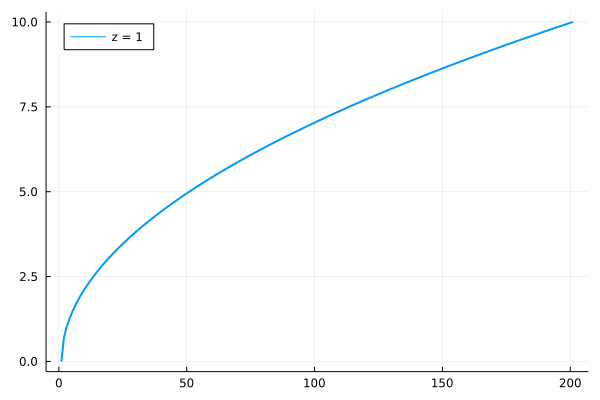

In [6]:
K = 100
α = 0.5
k = 0:0.5:K
z = 1

function production_per_capita(k, z)
    return y = z .* k .^ α
end

plot(production_per_capita(k, z), label = "z = 1", legend = :topleft, lw = 2)

Now we will generate the same plot, but this time we will include a tangent line that provides the value for the marginal product of capital at a point. This is similar to Figure 7.12 in Chapter 7 of the textbook. 

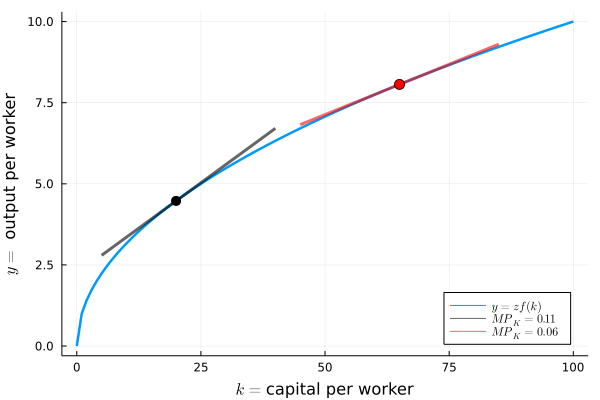

In [35]:
g(k; z = 1) = z .* k .^ α

a = round(g'(20), digits = 2)
b = round(g'(65), digits = 2)

gradient_line(f, x_0) = (x -> f(x_0) + f'(x_0) * (x - x_0))

plot(g, 0:1:100, legend = :bottomright, label = L"y = zf(k)", xlabel = L"$k = $capital per worker", ylabel = "\$y = \$ output per worker", lw = 2.5)
plot!(gradient_line(g, 20), 5:0.1:40, label = L"MP_K = %$a", lw = 3, alpha = 0.6, color = :black)
scatter!([20], [g(20)], label = "", markersize = 6, color = :black)

plot!(gradient_line(g, 65), 45:0.1:85, label = L"MP_K = %$b", lw = 3, alpha = 0.6, color = :red)
scatter!([65], [g(65)], label = "", markersize = 6, color = :red)


From above one can observe that the marginal product of capital (the slope of the graph) is decreasing with an increase in capital per worker. This illustrates the concavity of the function with respect to capital. 

### 2.4 Changes in capital over time


We make another assumption regarding capital. It wears out over time. This is referred to as depreciation $d$. Capital stock then changes over time according to the following equation, 

$$
K_{t+1} = (1 - d)K_t + I_{t}
$$

Now that we have the behaviour of firms and consumers we can put everything together to retrieve the competitive equilibrium result. 

## 3. Competitive equilibrium

One of the equilibrium conditions from the consumer side of the economy is that, 

$$
Y_t = C_t + I_t
$$

This means that current output is equal to aggregate consumption plus aggregate investment. From our equation for the change in capital over time we can substitute the investment component as follows, 

$$
K_{t+1} = (1 - d)K_{t} + Y_t - C_t
$$

We can then rearrange this equation to write in terms of $Y_t$, 

$$
Y_{t} = C_{t} + K_{t+1} - (1 - d)K_{t}
$$

Next, we use $C_{t} = (1-s)Y_{t}$ from the consumer's saving and investment decisions, 

$$
Y_{t} = (1-s)Y_{t} + K_{t+1} - (1 - d)K_{t}
$$

Finally, we rearrange and simplify, 

$$ 
\begin{align*}
Y_{t} - (1 - s)Y_{t} &= K_{t+1} - (1 - d)K_{t} \\
Y_{t}(1-1+s) & = K_{t+1} - (1 - d)K_{t} \\
K_{t+1} &=  sY_{t} + (1 - d)K_{t} 
\end{align*}
$$

This means that capital stock in the future period is the quantity of aggregate savings in current period plus the capital stock left over from the current period that has not depreciated. 

We can now substitute $Y$ using our definition from of the production function, 

$$
K_{t+1} =  sz \cdot F\left(K_{t}, N_{t}\right)  + (1 - d)K_{t} 
$$

We would like to express this equation of motion in per capita terms. We can do this by dividing through by the number of workers, 

$$
\frac{K_{t+1}}{N_t} =  sz \cdot \frac{F\left(K_{t}, N_{t}\right)}{N_t}  + (1 - d)\frac{K_{t}}{N_t} 
$$

Next, we multiply the left hand side by $1 = \frac{N_{t+1}}{N_{t+1}}$, which then gives us, 

$$
\begin{align*}
\frac{K_{t+1}}{N_t}\frac{N_{t+1}}{N_{t+1}} & =  sz \cdot \frac{F\left(K_{t}, N_{t}\right)}{N_t}  + (1 - d)\frac{K_{t}}{N_t} \\
\frac{K_{t+1}}{N_{t+1}}\frac{N_{t+1}}{N_{t}} & =  sz \cdot F\left(\frac{K_{t}}{N_t}, \frac{N_{t}}{N_t}\right)  + (1 - d)\frac{K_{t}}{N_t}  \\
k_{t+1}(1 + n) & =  sz \cdot f\left(k_t, 1\right)  + (1 - d)k_t \\ 
k_{t+1} & =  \frac{sz \cdot f\left(k_t\right)}{1+n}  + \frac{(1 - d)k_t}{1+n}
\end{align*}
$$

The key equation that we want to use in this tutorial is then, 

$$
k_{t+1} =  \frac{sz \cdot f\left(k_t\right)}{1+n}  + \frac{(1 - d)k_t}{1+n}
$$

This equation summarises what we need to know about competitive equilibrium in the Solow growth model. 



## 4. Steady state

In order to find the steady state of the Solow model, we can utilise the equation of motion for capital. The steady state in this model is going to be the point where there is no change in capital over time. In other words, it is the value that maintains a constant capital stock per capita over time. We will first determine this steady state algebraically, but then in our section on **difference equations** we will come back to a more accurate depiction of the notion of steady state. 

We are going to replicate Figure 7.13 from the textbook and indicate the steady state point on the graph. We are looking for the point where $k_{t} = k_{t+1} = k^{*}$. The value of $k^{*}$ is known as the steady state value of capital. This value will occur where the transition equation for capital intersects with the $45^{\degree}$ line (since this line reflects all the points where $k_{t+1} = k_{t}$).

We would like to know what the steady state value is going to be, so we first calculate it algebraically. Solving for $k^{*}$ from the equilibrium condition entails the following, 

$$
\begin{align*}
k^{*} &=  \frac{sz \cdot f\left(k^{*}\right)}{1+n}  + \frac{(1 - d)k^{*}}{1+n} \\
k^{*} &=  \frac{sz \cdot (k^{*})^{\alpha}}{1+n}  + \frac{(1 - d)k^{*}}{1+n} \\
(1 + n)k^{*} &=  sz \cdot (k^{*})^{\alpha}  + (1 - d)k^{*} \\
(d + n)k^{*} &= sz \cdot (k^{*})^{\alpha}         \\
 {k^*}^{1-\alpha} &= z \cdot \frac{s}{d + n} \\
  k^* &= \left[ z \cdot \frac{s}{d + n} \right]^{\frac{1}{1-\alpha}}
\end{align*}
$$



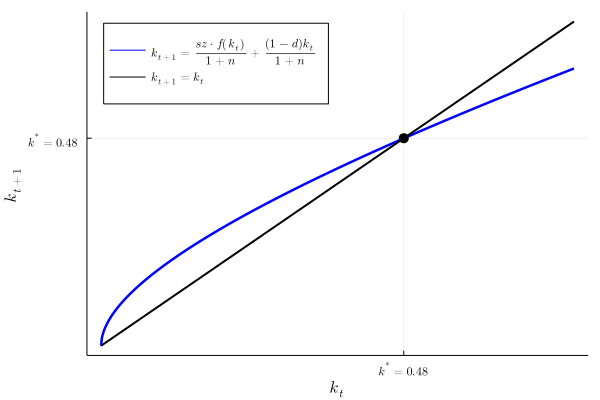

In [103]:
# parameter values (selected arbitrarily, can you think of values that make sense economically?)
s = 0.9             # savings rate at 90%! This seems quite high.
z = 1               # total factor productivity
d = 0.5             # depreciation rate
n = 0.8             # population growth rate   
α = 0.5             # output elasticity of capital

# calculate k_star from the formula above
k_star = round((z .* s ./ (d .+ n)) .^ (1 / (1 - α)), digits = 2)

# equation of motion for capital
h(k; s = 0.9, z = 1, d = 0.5, n = 0.8) = (s .* z .* g(k)) ./ (1 .+ n) .+ ((1 .- d) .* k) ./ (1 .+ n)  

# code for plotting the function -- try to read one line at a time. 
capital_plot = plot(h, 0:0.001:0.75, legend = :topleft, label = L"k_{t+1} = \frac{sz \cdot f\left(k_t\right)}{1+n}  + \frac{(1 - d)k_t}{1+n}", xlabel = L"k_t", ylabel = L"k_{t+1}", lw = 2.5, color = :blue, xticks = ([k_star], [L"k^{*} = %$k_star"]), y_ticks = ([k_star], [L"k^{*} = %$k_star"]))
plot!(capital_plot, x -> x, lw = 2, color =:black, lab = L"k_{t+1} = k_{t}") # 45 degree line plot added
scatter!([k_star], [k_star], label = "", markersize = 6, color = :black) # point of intersection

We see from the graph above that the two lines intersect at the point where $k^{*} = 0.48$. The value will change if we select a different parameterisation of the model. 

## 5. Shocks

One of the things we can easily see is the effect that an increase in productivity will have on the production function. We use a `for loop` to iterate over the different values of $z$.

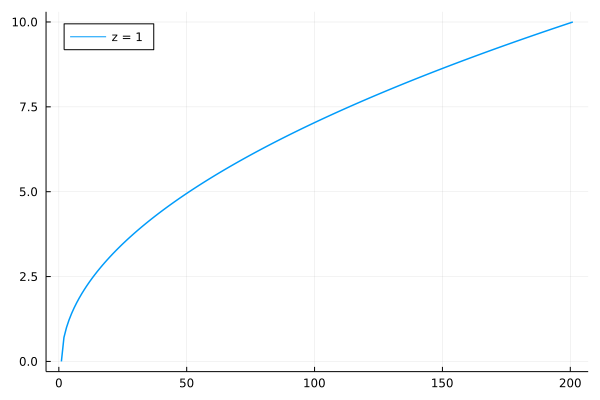

In [7]:
p1 = plot()

for i in z
    plot!(p1, production_per_capita(k, i), label = "z = $i", legend = :topleft, lw = 1.5)
end

plot(p1)

We see that with an increase in $z$ the boundary of the production function shifts upward. This indicates that we are able to produce a higher level of output at each given level of capital. In other words, the productivity increase augments our ability to generate output from an existing capital stock. 

## 6. Difference equations (optional)

The key equation for the Solow model is a type of **difference equation**.  

In the next section we are going to provide a brief introduction to difference equations and then link this back to how we can solve and analyse the behaviour of the components of the Solow model. These notes are an almost direct port of the Python ones at [QuantEcon](https://python.quantecon.org/scalar_dynam.html). Please look at that website for a more complete exploration of difference equations. 

This section is perhaps a bit more technical, so be sure to **slowly** go through the material. 

### 5.1 Foundations

A **time homogeneous first order difference equation** is of the form, 

$$
x_{t+1} = g(x_t)
$$

where $g$ is a function from some subset of the real numbers to itself. In other words, 

$$
g: S \rightarrow S
$$


$S$ is called the **state space**, and $x$ is the **state variable**.

Time homogeneity means that $g$ is the same at each time $t$

First order means dependence on only one lag (only depends $x_t$, not on earlier points such as $x_{t-1}$)

If $x_0 \in S$, then our difference equation above **recursively** defines the following sequence, 

$$
x_0, x_1 = g(x_0), x_2 = g(x_1) = g(g(x_0)), \quad \text{etc.}
$$

This sequence defines the trajectory of $x_0$ under the function $g$.

In other words, if we started at $x_0$, this sequence maps out how the variable would move over time given the function $g$ being applied to the variable multiple times.

If we think of $g^{n}$ to be $n$ compositions of $g$ with itself, then we can write the trajectory as

$$
x_t = g^{t}(x_{0})
$$

If $n = 2$, the composition would be $g^{2}(x_0) = g(g(x_0))$. In other words, applying the function $g$ twice. 

### 5.2 Example: Linear model